In [7]:
import numpy as np
import pandas as pd
import math
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [8]:
import pickle
train_data = pd.read_pickle("train_processed_2_months.pkl")

In [9]:
train_data = train_data.drop(["Date", "Customer_Code", "New_customer_index", "Date_Acc_Open", 'Customer_Relation_Type_Beginning_Month_A',
       'Customer_Relation_Type_Beginning_Month_I',
       'Customer_Relation_Type_Beginning_Month_N',
       'Customer_Relation_Type_Beginning_Month_P',
       'Customer_Relation_Type_Beginning_Month_R',
       'Segmentation_01 - TOP', 'Segmentation_02 - PARTICULARES',
       'Segmentation_03 - UNIVERSITARIO'], axis = 1)

print (train_data.shape)

(1232486, 87)


In [10]:
# The names of our features
columns = train_data.columns
print (columns)

Index(['Age', 'Customer_Seniority', 'Household_Income', 'Residence_Index_N',
       'Residence_Index_S', 'Foreigner_Index_N', 'Foreigner_Index_S',
       'Activity_Index_0.0', 'Activity_Index_1.0', 'Sex_H', 'Sex_V',
       'Province_Name_ALAVA', 'Province_Name_ALBACETE',
       'Province_Name_ALICANTE', 'Province_Name_ALMERIA',
       'Province_Name_ASTURIAS', 'Province_Name_AVILA',
       'Province_Name_BADAJOZ', 'Province_Name_BALEARS, ILLES',
       'Province_Name_BARCELONA', 'Province_Name_BIZKAIA',
       'Province_Name_BURGOS', 'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_CUENCA', 'Province_Name_GIPUZKOA',
       'Province_Name_GIRONA', 'Province_Name_GRANADA',
       'Province_Name_GUADALAJARA', 'Province_Name_HUELVA',
       'Province_Name_HUESCA', 'Province_Name_JAEN', 'Provin

In [11]:
#print (train_data.iloc[:5, -24:])

In [12]:
train_data['Household_Income'].mean()

0.00456311222916044

In [13]:
train_data['Household_Income'].fillna(0.00456585623458668,inplace=True)

In [14]:
train_data["Age"] = train_data["Age"].astype(float)
train_data['Age'].median()

0.3245614035087719

In [15]:
train_data['Age'].fillna(0.3245614035087719,inplace=True)

In [16]:
train_data["Customer_Seniority"] = train_data["Customer_Seniority"].astype(float)
train_data['Customer_Seniority'].mode()

0    0.04878
dtype: float64

In [17]:
train_data['Customer_Seniority'].fillna(0.04878,inplace=True)

In [18]:
features = train_data.columns
print (len(features))

87


0    1232311
1        175
Name: Saving_Account, dtype: int64

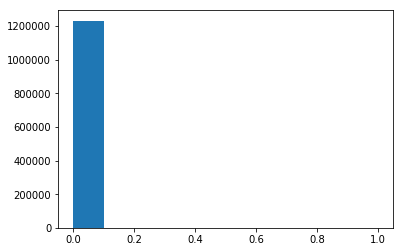

In [13]:
# Imbalance in Savings_Account
plt.hist(train_data['Saving_Account'])
train_data['Saving_Account'].value_counts()

In [14]:
# Oversampling to decrease imbalance in product columns
from imblearn.over_sampling import SMOTE

X_sav = train_data[features]
y_sav = train_data['Saving_Account']

sm = SMOTE()
X_sav, y_sav = sm.fit_sample(X_sav, y_sav)

1    1232311
0    1232311
dtype: int64

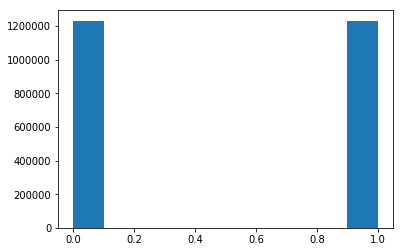

In [15]:
# Ratio of classes after over-sampling
plt.hist(y_sav)
pd.Series(y_sav).value_counts()

0    615142
1        19
Name: Guarantees, dtype: int64

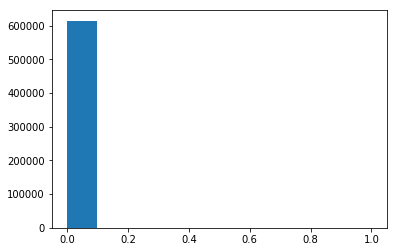

In [18]:
# Imbalance in Guarantees
plt.hist(train_data['Guarantees'])
train_data['Guarantees'].value_counts()

In [19]:
# Oversampling to decrease imbalance in product columns
X_guar = train_data[features]
y_guar = train_data['Guarantees']

sm = SMOTE()
X_guar, y_guar = sm.fit_sample(X_guar, y_guar)

1    615142
0    615142
dtype: int64

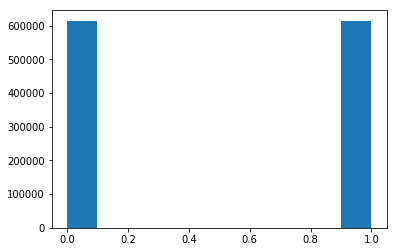

In [20]:
# Ratio of classes after over-sampling
plt.hist(y_guar)
pd.Series(y_guar).value_counts()

1    482723
0    132438
Name: Current_Account, dtype: int64


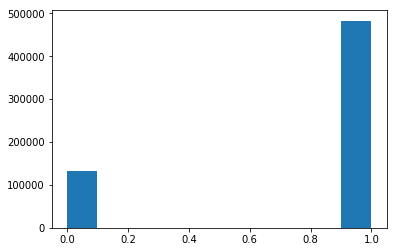

In [22]:
# Imbalance in Current_Account
plt.hist(train_data['Current_Account'])
print (train_data['Current_Account'].value_counts())

X_curr_acc = train_data[features]
y_curr_acc = train_data['Current_Account']

In [98]:
# Oversampling to decrease imbalance in product columns
X_curr_acc = train_data[features]
y_curr_acc = train_data['Current_Account']

sm = SMOTE()
X_curr_acc, y_curr_acc = sm.fit_sample(X_curr_acc, y_curr_acc)

1    482723
0    482723
dtype: int64

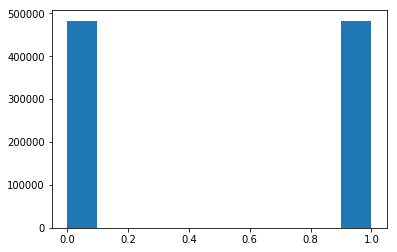

In [99]:
# Ratio of classes after over-sampling
plt.hist(y_curr_acc)
pd.Series(y_curr_acc).value_counts()

0    614864
1       297
Name: Derivada_Account, dtype: int64

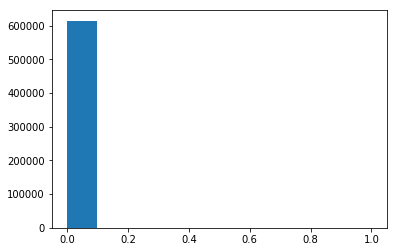

In [23]:
# Imbalance in Derivada_Account
plt.hist(train_data['Derivada_Account'])
train_data['Derivada_Account'].value_counts()

In [24]:
# Oversampling to decrease imbalance in product columns
X_der_acc = train_data[features]
y_der_acc = train_data['Derivada_Account']

sm = SMOTE()
X_der_acc, y_der_acc = sm.fit_sample(X_der_acc, y_der_acc)

1    614864
0    614864
dtype: int64

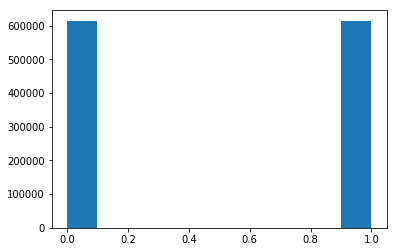

In [25]:
# Ratio of classes after over-sampling
plt.hist(y_der_acc)
pd.Series(y_der_acc).value_counts()

0    556824
1     58337
Name: Payroll_Account, dtype: int64

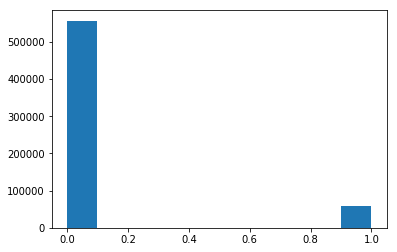

In [26]:
# Imbalance in Payroll_Account
plt.hist(train_data['Payroll_Account'])
train_data['Payroll_Account'].value_counts()

In [27]:
# Oversampling to decrease imbalance in product columns
X_pay_acc = train_data[features]
y_pay_acc = train_data['Payroll_Account']

sm = SMOTE()
X_pay_acc, y_pay_acc = sm.fit_sample(X_pay_acc, y_pay_acc)

1    556824
0    556824
dtype: int64

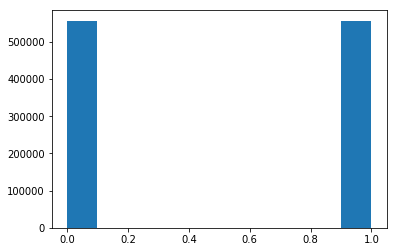

In [28]:
# Ratio of classes after over-sampling
plt.hist(y_pay_acc)
pd.Series(y_pay_acc).value_counts()

0    607454
1      7707
Name: Junior_Account, dtype: int64

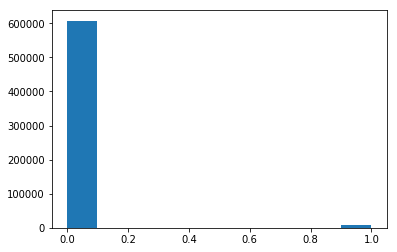

In [29]:
# Imbalance in Junior_Account
plt.hist(train_data['Junior_Account'])
train_data['Junior_Account'].value_counts()

In [30]:
# Oversampling to decrease imbalance in product columns
X_jun_acc = train_data[features]
y_jun_acc = train_data['Junior_Account']

sm = SMOTE()
X_jun_acc, y_jun_acc = sm.fit_sample(X_jun_acc, y_jun_acc)

1    607454
0    607454
dtype: int64

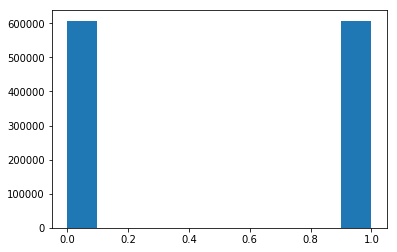

In [31]:
# Ratio of classes after over-sampling
plt.hist(y_jun_acc)
pd.Series(y_jun_acc).value_counts()

0    606928
1      8233
Name: MAS_Particular_Account, dtype: int64

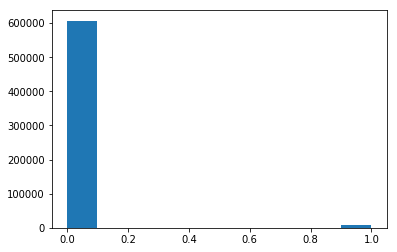

In [32]:
# Imbalance in MAS_Particular_Account
plt.hist(train_data['MAS_Particular_Account'])
train_data['MAS_Particular_Account'].value_counts()

In [34]:
# Oversampling to decrease imbalance in product columns
X_mas_part = train_data[features]
y_mas_part = train_data['MAS_Particular_Account']

sm = SMOTE()
X_mas_part, y_mas_part = sm.fit_sample(X_mas_part, y_mas_part)

1    1216198
0    1216198
dtype: int64

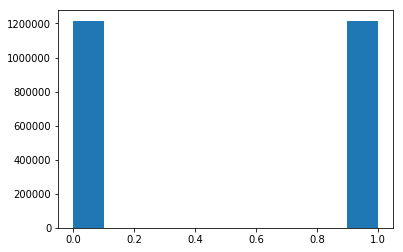

In [36]:
# Ratio of classes after over-sampling
plt.hist(y_mas_part)
pd.Series(y_mas_part).value_counts()

0    1023674
1     208812
Name: Particular_Account, dtype: int64


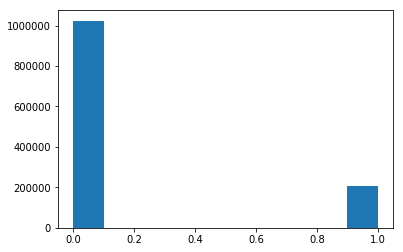

In [16]:
# Imbalance in Particular_Account
plt.hist(train_data['Particular_Account'])
print (train_data['Particular_Account'].value_counts())

X_part_acc = train_data[features]
y_part_acc = train_data['Particular_Account']

In [ ]:
# Oversampling to decrease imbalance in product columns
X_part_acc = train_data[features]
y_part_acc = train_data['Particular_Account']

sm = SMOTE()
X_part_acc, y_part_acc = sm.fit_sample(X_part_acc, y_part_acc)

In [ ]:
# Ratio of classes after over-sampling
plt.hist(y_part_acc)
pd.Series(y_part_acc).value_counts()

0    579465
1     35696
Name: Particular_Plus_Account, dtype: int64

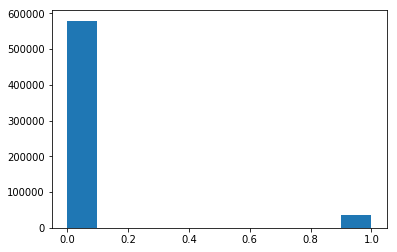

In [35]:
# Imbalance in Particular_Plus_Account
plt.hist(train_data['Particular_Plus_Account'])
train_data['Particular_Plus_Account'].value_counts()

In [37]:
# Oversampling to decrease imbalance in product columns
X_part_plus = train_data[features]
y_part_plus = train_data['Particular_Plus_Account']

sm = SMOTE()
X_part_plus, y_part_plus = sm.fit_sample(X_part_plus, y_part_plus)

1    579465
0    579465
dtype: int64

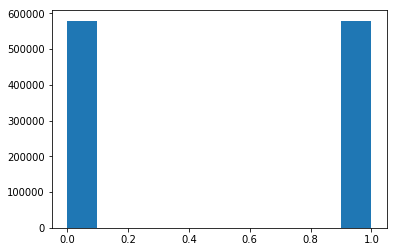

In [38]:
# Ratio of classes after over-sampling
plt.hist(y_part_plus)
pd.Series(y_part_plus).value_counts()

0    613685
1      1476
Name: Short_Term_Deposit, dtype: int64

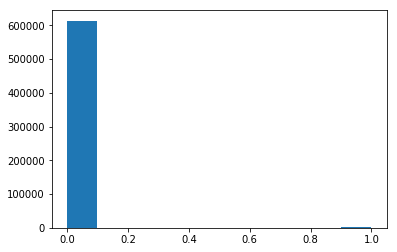

In [39]:
# Imbalance in Short_Term_Deposit
plt.hist(train_data['Short_Term_Deposit'])
train_data['Short_Term_Deposit'].value_counts()

In [13]:
# Oversampling to decrease imbalance in product columns
X_short = train_data[features]
y_short = train_data['Short_Term_Deposit']

sm = SMOTE()
X_short, y_short = sm.fit_sample(X_short, y_short)

1    613685
0    613685
dtype: int64

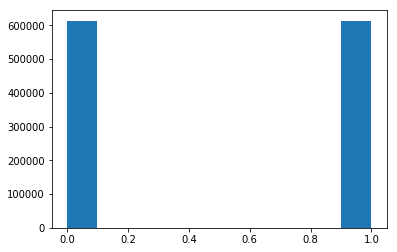

In [41]:
# Ratio of classes after over-sampling
plt.hist(y_short)
pd.Series(y_short).value_counts()

0    613556
1      1605
Name: Medium_Term_Deposit, dtype: int64

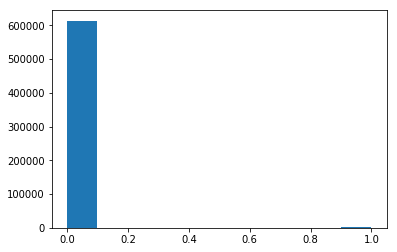

In [42]:
# Imbalance in Medium_Term_Deposit
plt.hist(train_data['Medium_Term_Deposit'])
train_data['Medium_Term_Deposit'].value_counts()

In [44]:
# Oversampling to decrease imbalance in product columns
X_medium = train_data[features]
y_medium = train_data['Medium_Term_Deposit']

sm = SMOTE()
X_medium, y_medium = sm.fit_sample(X_medium, y_medium)

1    613556
0    613556
dtype: int64

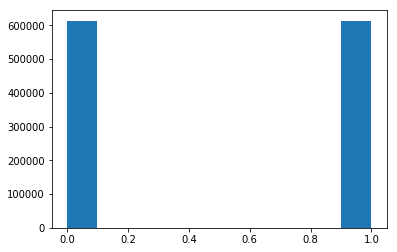

In [45]:
# Ratio of classes after over-sampling
plt.hist(y_medium)
pd.Series(y_medium).value_counts()

0    579607
1     35554
Name: Long_Term_Deposit, dtype: int64

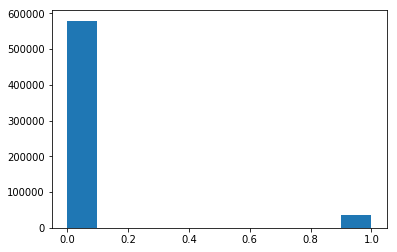

In [46]:
# Imbalance in Long_Term_Deposit
plt.hist(train_data['Long_Term_Deposit'])
train_data['Long_Term_Deposit'].value_counts()

In [18]:
# Oversampling to decrease imbalance in product columns
X_long = train_data[features]
y_long = train_data['Long_Term_Deposit']

sm = SMOTE()
X_long, y_long = sm.fit_sample(X_long, y_long)

1    579607
0    579607
dtype: int64

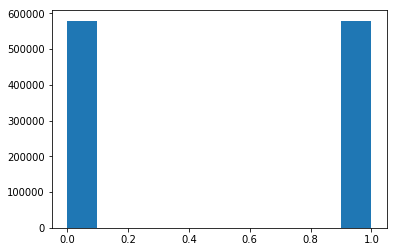

In [48]:
# Ratio of classes after over-sampling
plt.hist(y_long)
pd.Series(y_long).value_counts()

0    555411
1     59750
Name: E_Account, dtype: int64

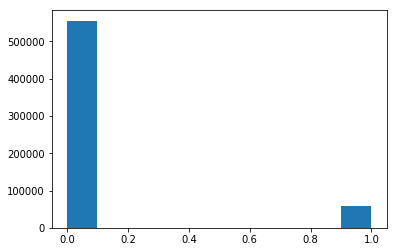

In [49]:
# Imbalance in E_Account
plt.hist(train_data['E_Account'])
train_data['E_Account'].value_counts()

In [50]:
# Oversampling to decrease imbalance in product columns
X_eacc = train_data[features]
y_eacc = train_data['E_Account']

sm = SMOTE()
X_eacc, y_eacc = sm.fit_sample(X_eacc, y_eacc)

1    555411
0    555411
dtype: int64

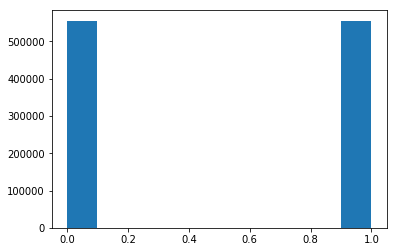

In [51]:
# Ratio of classes after over-sampling
plt.hist(y_eacc)
pd.Series(y_eacc).value_counts()

0    601477
1     13684
Name: Funds, dtype: int64

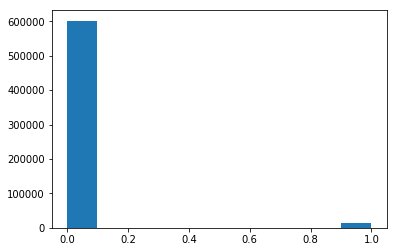

In [52]:
# Imbalance in Funds
plt.hist(train_data['Funds'])
train_data['Funds'].value_counts()

In [54]:
# Oversampling to decrease imbalance in product columns
X_funds = train_data[features]
y_funds = train_data['Funds']

sm = SMOTE()
X_funds, y_funds = sm.fit_sample(X_funds, y_funds)

1    601477
0    601477
dtype: int64

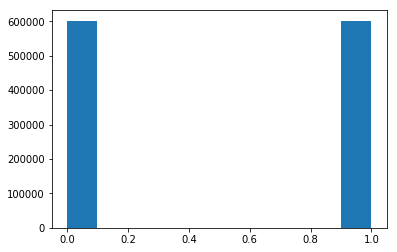

In [55]:
# Ratio of classes after over-sampling
plt.hist(y_funds)
pd.Series(y_funds).value_counts()

0    610218
1      4943
Name: Mortgage, dtype: int64

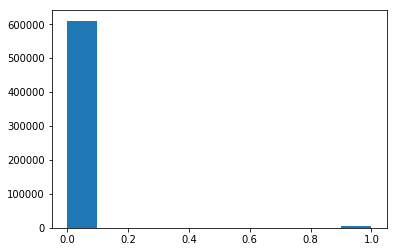

In [56]:
# Imbalance in Mortgage
plt.hist(train_data['Mortgage'])
train_data['Mortgage'].value_counts()

In [20]:
# Oversampling to decrease imbalance in product columns
X_mort = train_data[features]
y_mort = train_data['Mortgage']

sm = SMOTE()
X_mort, y_mort = sm.fit_sample(X_mort, y_mort)

1    1222608
0    1222608
dtype: int64

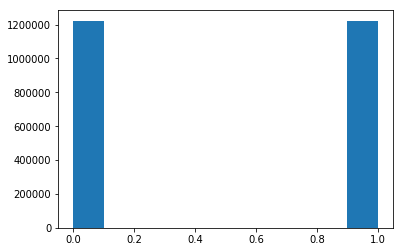

In [21]:
# Ratio of classes after over-sampling
plt.hist(y_mort)
pd.Series(y_mort).value_counts()

0.0    1144893
1.0      87593
Name: Pensions1, dtype: int64

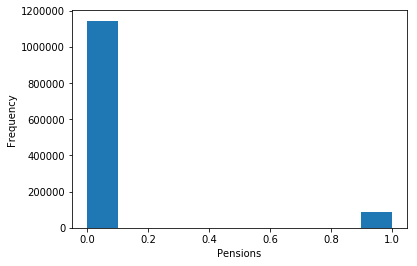

In [5]:
# Imbalance in Pensions1
plt.hist(train_data['Pensions1'])
plt.xlabel('Pensions')
plt.ylabel('Frequency')
train_data['Pensions1'].value_counts()

In [19]:
# Oversampling to decrease imbalance in product columns
X_pen1 = train_data[features]
y_pen1 = train_data['Pensions1']

sm = SMOTE()
X_pen1, y_pen1 = sm.fit_sample(X_pen1, y_pen1)

1.0    1144893
0.0    1144893
dtype: int64

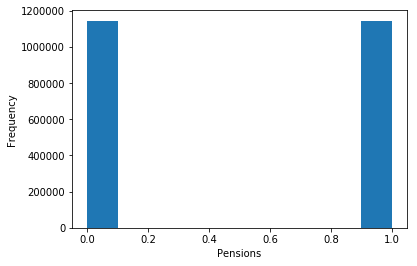

In [20]:
# Ratio of classes after over-sampling
plt.hist(y_pen1)
plt.xlabel('Pensions')
plt.ylabel('Frequency')
pd.Series(y_pen1).value_counts()

0    613091
1      2070
Name: Loans, dtype: int64

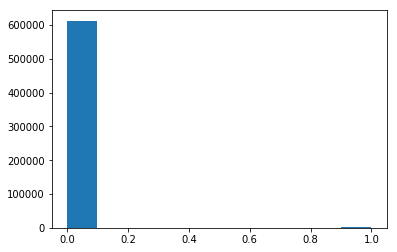

In [63]:
# Imbalance in Loans
plt.hist(train_data['Loans'])
train_data['Loans'].value_counts()

In [66]:
# Oversampling to decrease imbalance in product columns
X_loan = train_data[features]
y_loan = train_data['Loans']

sm = SMOTE()
X_loan, y_loan = sm.fit_sample(X_loan, y_loan)

1    613091
0    613091
dtype: int64

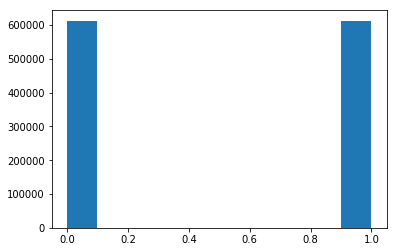

In [67]:
# Ratio of classes after over-sampling
plt.hist(y_loan)
pd.Series(y_loan).value_counts()

0    578509
1     36652
Name: Taxes, dtype: int64

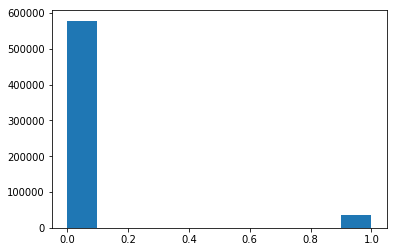

In [68]:
# Imbalance in Taxes
plt.hist(train_data['Taxes'])
train_data['Taxes'].value_counts()

In [69]:
# Oversampling to decrease imbalance in product columns
X_tax= train_data[features]
y_tax = train_data['Taxes']

sm = SMOTE()
X_tax, y_tax = sm.fit_sample(X_tax, y_tax)

1    578509
0    578509
dtype: int64

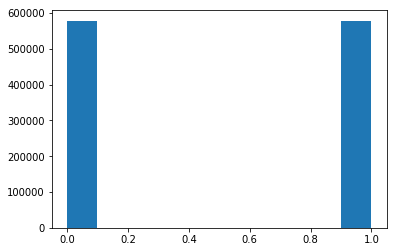

In [70]:
# Ratio of classes after over-sampling
plt.hist(y_tax)
pd.Series(y_tax).value_counts()

0    579872
1     35289
Name: Credit_card, dtype: int64

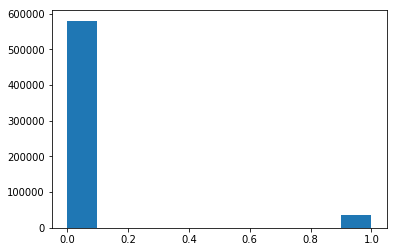

In [71]:
# Imbalance in Credit_card
plt.hist(train_data['Credit_card'])
train_data['Credit_card'].value_counts()

In [25]:
# Oversampling to decrease imbalance in product columns
X_cred = train_data[features]
y_cred = train_data['Credit_card']

sm = SMOTE()
X_cred, y_cred = sm.fit_sample(X_cred, y_cred)

1    579872
0    579872
dtype: int64

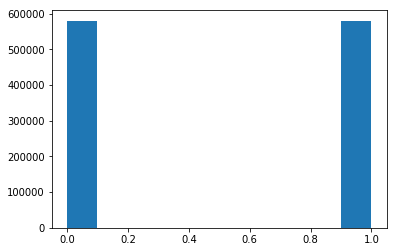

In [73]:
# Ratio of classes after over-sampling
plt.hist(y_cred)
pd.Series(y_cred).value_counts()

0    595132
1     20029
Name: Securities, dtype: int64

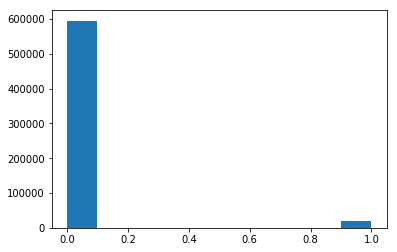

In [74]:
# Imbalance in Securities
plt.hist(train_data['Securities'])
train_data['Securities'].value_counts()

In [78]:
# Oversampling to decrease imbalance in product columns
X_sec = train_data[features]
y_sec = train_data['Securities']

sm = SMOTE()
X_sec, y_sec = sm.fit_sample(X_sec, y_sec)

1    595132
0    595132
dtype: int64

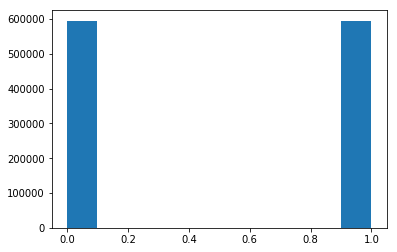

In [76]:
# Ratio of classes after over-sampling
plt.hist(y_sec)
pd.Series(y_sec).value_counts()

0    611964
1      3197
Name: Home_Account, dtype: int64

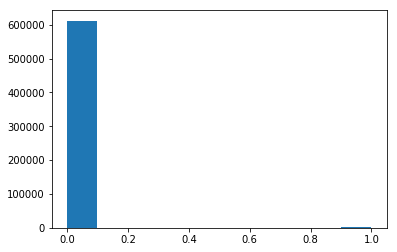

In [77]:
# Imbalance in Home_Account
plt.hist(train_data['Home_Account'])
train_data['Home_Account'].value_counts()

In [79]:
# Oversampling to decrease imbalance in product columns
X_home_acc = train_data[features]
y_home_acc = train_data['Home_Account']

sm = SMOTE()
X_home_acc, y_home_acc = sm.fit_sample(X_home_acc, y_home_acc)

1    611964
0    611964
dtype: int64

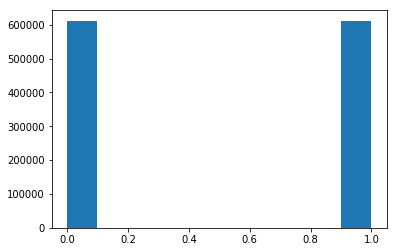

In [80]:
# Ratio of classes after over-sampling
plt.hist(y_home_acc)
pd.Series(y_home_acc).value_counts()

0.0    576408
1.0     38753
Name: Payroll, dtype: int64

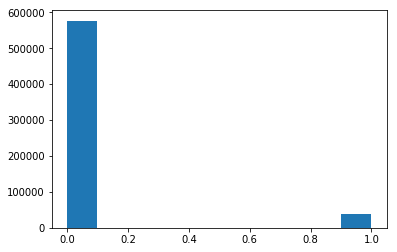

In [81]:
# Imbalance in Payroll
plt.hist(train_data['Payroll'])
train_data['Payroll'].value_counts()

In [30]:
# Oversampling to decrease imbalance in product columns
X_pay = train_data[features]
y_pay = train_data['Payroll']

sm = SMOTE()
X_pay, y_pay = sm.fit_sample(X_pay, y_pay)

1.0    1153249
0.0    1153249
dtype: int64

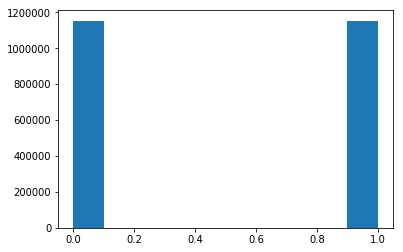

In [31]:
# Ratio of classes after over-sampling
plt.hist(y_pay)
pd.Series(y_pay).value_counts()

0.0    572093
1.0     43068
Name: Pensions2, dtype: int64

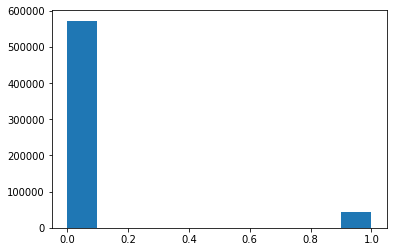

In [83]:
# Imbalance in Pensions2
plt.hist(train_data['Pensions2'])
train_data['Pensions2'].value_counts()

In [85]:
# Oversampling to decrease imbalance in product columns
X_pen2 = train_data[features]
y_pen2 = train_data['Pensions2']

sm = SMOTE()
X_pen2, y_pen2 = sm.fit_sample(X_pen2, y_pen2)

1.0    572093
0.0    572093
dtype: int64

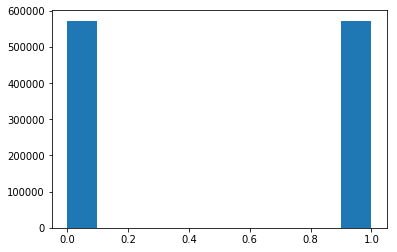

In [86]:
# Ratio of classes after over-sampling
plt.hist(y_pen2)
pd.Series(y_pen2).value_counts()

0    520220
1     94941
Name: Direct_Debit, dtype: int64

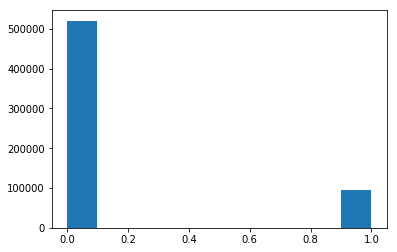

In [87]:
# Imbalance in Direct_Debit
plt.hist(train_data['Direct_Debit'])
train_data['Direct_Debit'].value_counts()

In [ ]:
# Oversampling to decrease imbalance in product columns
X_dir_deb = train_data[features]
y_dir_deb = train_data['Direct_Debit']

sm = SMOTE()
X_dir_deb, y_dir_deb = sm.fit_sample(X_dir_deb, y_dir_deb)

In [17]:
# data = train_data.iloc[:10000, :]
# data = data[["Customers_Country_Residence", "Sex", "Age", "Customer_Seniority", "Activity_Index", "Household_Income",'Saving_Account', 'Guarantees',
#        'Current_Account', 'Derivada_Account', 'Payroll_Account',
#        'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
#        'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
#        'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
#        'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
#        'Payroll', 'Pensions2', 'Direct_Debit']]

In [16]:
# data[['Saving_Account', 'Guarantees',
#        'Current_Account', 'Derivada_Account', 'Payroll_Account',
#        'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
#        'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
#        'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
#        'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
#        'Payroll', 'Pensions2', 'Direct_Debit']] = data[['Saving_Account', 'Guarantees',
#        'Current_Account', 'Derivada_Account', 'Payroll_Account',
#        'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
#        'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
#        'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
#        'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
#        'Payroll', 'Pensions2', 'Direct_Debit']].fillna(0).astype(int)

In [18]:
columns = train_data.columns
columns = ['Age', 'Customer_Seniority', 'Household_Income', 'Activity_Index_0.0',
       'Activity_Index_1.0', 'Province_Name_ALAVA', 'Province_Name_ALBACETE',
       'Province_Name_ALICANTE', 'Province_Name_ALMERIA',
       'Province_Name_ASTURIAS', 'Province_Name_AVILA',
       'Province_Name_BADAJOZ', 'Province_Name_BALEARS, ILLES',
       'Province_Name_BARCELONA', 'Province_Name_BIZKAIA',
       'Province_Name_BURGOS', 'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_CUENCA', 'Province_Name_GIPUZKOA',
       'Province_Name_GIRONA', 'Province_Name_GRANADA',
       'Province_Name_GUADALAJARA', 'Province_Name_HUELVA',
       'Province_Name_HUESCA', 'Province_Name_JAEN', 'Province_Name_LEON',
       'Province_Name_LERIDA', 'Province_Name_LUGO', 'Province_Name_MADRID',
       'Province_Name_MALAGA', 'Province_Name_MELILLA', 'Province_Name_MURCIA',
       'Province_Name_NAVARRA', 'Province_Name_OURENSE',
       'Province_Name_PALENCIA', 'Province_Name_PALMAS, LAS',
       'Province_Name_PONTEVEDRA', 'Province_Name_RIOJA, LA',
       'Province_Name_SALAMANCA', 'Province_Name_SANTA CRUZ DE TENERIFE',
       'Province_Name_SEGOVIA', 'Province_Name_SEVILLA', 'Province_Name_SORIA',
       'Province_Name_TARRAGONA', 'Province_Name_TERUEL',
       'Province_Name_TOLEDO', 'Province_Name_VALENCIA',
       'Province_Name_VALLADOLID', 'Province_Name_ZAMORA',
       'Province_Name_ZARAGOZA', 'Sex_H', 'Sex_V','Foreigner_Index_N',
       'Foreigner_Index_S', 'Residence_Index_N', 'Residence_Index_S']

In [15]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

In [28]:
#Predicting whether a customer will buy "Savings_Account" based on all the input features
X_sav_train, X_sav_test, y_sav_train, y_sav_test = train_test_split(X_sav, y_sav, test_size=0.30, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)


clf = ExtraTreesClassifier(n_estimators=30, max_depth=2)
clf.fit(X_sav_train, y_sav_train)
sav_predictions = clf.predict(X_sav_test)

accuracy = accuracy_score(y_sav_test, sav_predictions)
pred_prob = clf.predict_proba(X_sav_test)

loss = log_loss(y_sav_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Saving_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_sav_test, sav_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_sav_test, sav_predictions))


#####Extremely Randomized Trees######

*****Saving_Account*****:
Accuracy= 0.9615559916525446 
Log Loss= 0.47609840926385166
Classification Report:
              precision    recall  f1-score   support

          0       0.96      0.96      0.96    369331
          1       0.96      0.96      0.96    370056

avg / total       0.96      0.96      0.96    739387

Confusion Matrix:
 [[354364  14967]
 [ 13458 356598]]


In [102]:
#Predicting whether a customer will buy "Guarantees" based on all the input features
X_guar_train, X_guar_test, y_guar_train, y_guar_test = train_test_split(X_guar, y_guar, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)


clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_guar_train, y_guar_train)
guar_predictions = clf.predict(X_guar_test)

accuracy = accuracy_score(y_guar_test, guar_predictions)
pred_prob = clf.predict_proba(X_guar_test)

loss = log_loss(y_guar_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Guarantees*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_guar_test, guar_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_guar_test, guar_predictions))


#####Extremely Randomized Trees######

*****Guarantees*****:
Accuracy= 0.943698675349882 
Log Loss= 0.30312656670881216
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94    203022
           1       0.95      0.94      0.94    202972

   micro avg       0.94      0.94      0.94    405994
   macro avg       0.94      0.94      0.94    405994
weighted avg       0.94      0.94      0.94    405994

Confusion Matrix:
 [[193305   9717]
 [ 13141 189831]]


In [104]:
#Predicting whether a customer will buy "Current_Account" based on all the input features
X_curr_acc_train, X_curr_acc_test, y_curr_acc_train, y_curr_acc_test = train_test_split(X_curr_acc, y_curr_acc, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_curr_acc_train, y_curr_acc_train)
curr_acc_predictions = clf.predict(X_curr_acc_test)

accuracy = accuracy_score(y_curr_acc_test, curr_acc_predictions)
pred_prob = clf.predict_proba(X_curr_acc_test)

loss = log_loss(y_curr_acc_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Current_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_curr_acc_test, curr_acc_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_curr_acc_test, curr_acc_predictions))


#####Extremely Randomized Trees######

*****Current_Account*****:
Accuracy= 0.9046321696934695 
Log Loss= 0.5012572103444983
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90    159223
           1       0.85      0.99      0.91    159375

   micro avg       0.90      0.90      0.90    318598
   macro avg       0.92      0.90      0.90    318598
weighted avg       0.92      0.90      0.90    318598

Confusion Matrix:
 [[130838  28385]
 [  1999 157376]]


In [105]:
#Predicting whether a customer will buy "Derivada_Account" based on all the input features
X_der_acc_train, X_der_acc_test, y_der_acc_train, y_der_acc_test = train_test_split(X_der_acc, y_der_acc, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_der_acc_train, y_der_acc_train)
der_acc_predictions = clf.predict(X_der_acc_test)

accuracy = accuracy_score(y_der_acc_test, der_acc_predictions)
pred_prob = clf.predict_proba(X_der_acc_test)

loss = log_loss(y_der_acc_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Derivada_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_der_acc_test, der_acc_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_der_acc_test, der_acc_predictions))


#####Extremely Randomized Trees######

*****Derivada_Account*****:
Accuracy= 0.9603189662182642 
Log Loss= 0.3511494097873431
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    202948
           1       1.00      0.92      0.96    202863

   micro avg       0.96      0.96      0.96    405811
   macro avg       0.96      0.96      0.96    405811
weighted avg       0.96      0.96      0.96    405811

Confusion Matrix:
 [[202659    289]
 [ 15814 187049]]


In [32]:
#Predicting whether a customer will buy "Payroll_Account" based on all the input features
X_pay_train, X_pay_test, y_pay_train, y_pay_test = train_test_split(X_pay, y_pay, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=1)
clf.fit(X_pay_train, y_pay_train)
pay_predictions = clf.predict(X_pay_test)

accuracy = accuracy_score(y_pay_test, pay_predictions)
pred_prob = clf.predict_proba(X_pay_test)

loss = log_loss(y_pay_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Payroll_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_pay_test, pay_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_pay_test, pay_predictions))


#####Extremely Randomized Trees######

*****Payroll_Account*****:
Accuracy= 0.9796280603564367 
Log Loss= 0.2947200613094513
Classification Report:
              precision    recall  f1-score   support

        0.0       0.99      0.97      0.98    380561
        1.0       0.97      0.99      0.98    380584

avg / total       0.98      0.98      0.98    761145

Confusion Matrix:
 [[370373  10188]
 [  5318 375266]]


In [38]:
#Predicting whether a customer will buy "MAS_Particulars_Account" based on all the input features
X_mas_part_train, X_mas_part_test, y_mas_part_train, y_mas_part_test = train_test_split(X_mas_part, y_mas_part, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=30, max_depth=1)
clf.fit(X_mas_part_train, y_mas_part_train)
mas_part_predictions = clf.predict(X_mas_part_test)

accuracy = accuracy_score(y_mas_part_test, mas_part_predictions)
pred_prob = clf.predict_proba(X_mas_part_test)

loss = log_loss(y_mas_part_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****MAS_Particular_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_mas_part_test, mas_part_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_mas_part_test, mas_part_predictions))


#####Extremely Randomized Trees######

*****MAS_Particular_Account*****:
Accuracy= 0.957352206515334 
Log Loss= 0.5845938434878633
Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.94      0.96    400719
          1       0.94      0.97      0.96    401972

avg / total       0.96      0.96      0.96    802691

Confusion Matrix:
 [[376656  24063]
 [ 10170 391802]]


In [110]:
#Predicting whether a customer will buy "Particulars_Plus_Account" based on all the input features
X_part_plus_train, X_part_plus_test, y_part_plus_train, y_part_plus_test = train_test_split(X_part_plus, y_part_plus, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_part_plus_train, y_part_plus_train)
part_plus_predictions = clf.predict(X_part_plus_test)

accuracy = accuracy_score(y_part_plus_test, part_plus_predictions)
pred_prob = clf.predict_proba(X_part_plus_test)

loss = log_loss(y_part_plus_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Particular_Plus_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_part_plus_test, part_plus_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_part_plus_test, part_plus_predictions))



#####Extremely Randomized Trees######

*****Particular_Plus_Account*****:
Accuracy= 0.9486229464474816 
Log Loss= 0.46439321039217296
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    191508
           1       0.96      0.94      0.95    190939

   micro avg       0.95      0.95      0.95    382447
   macro avg       0.95      0.95      0.95    382447
weighted avg       0.95      0.95      0.95    382447

Confusion Matrix:
 [[183582   7926]
 [ 11723 179216]]


In [17]:
#Predicting whether a customer will buy "Short_Term_Deposit" based on all the input features
X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(X_short, y_short, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=1)
clf.fit(X_short_train, y_short_train)
short_predictions = clf.predict(X_short_test)

accuracy = accuracy_score(y_short_test, short_predictions)
pred_prob = clf.predict_proba(X_short_test)

loss = log_loss(y_short_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Short_Term_Deposit*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_short_test, short_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_short_test, short_predictions))


#####Extremely Randomized Trees######

*****Short_Term_Deposit*****:
Accuracy= 0.9944547385602786 
Log Loss= 0.5778235298944884
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.99      0.99    405302
          1       0.99      1.00      0.99    405841

avg / total       0.99      0.99      0.99    811143

Confusion Matrix:
 [[402563   2739]
 [  1759 404082]]


In [112]:
#Predicting whether a customer will buy "Short_Term_Deposit" based on all the input features
X_medium_train, X_medium_test, y_medium_train, y_medium_test = train_test_split(X_medium, y_medium, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)


clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_medium_train, y_medium_train)
medium_predictions = clf.predict(X_medium_test)

accuracy = accuracy_score(y_medium_test, medium_predictions)
pred_prob = clf.predict_proba(X_medium_test)

loss = log_loss(y_medium_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Medium_Term_Deposit*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_medium_test, medium_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_medium_test, medium_predictions))


#####Extremely Randomized Trees######

*****Medium_Term_Deposit*****:
Accuracy= 0.9845115533637735 
Log Loss= 0.311478887594554
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98    202414
           1       0.98      0.99      0.98    202533

   micro avg       0.98      0.98      0.98    404947
   macro avg       0.98      0.98      0.98    404947
weighted avg       0.98      0.98      0.98    404947

Confusion Matrix:
 [[197902   4512]
 [  1760 200773]]


In [19]:
#Predicting whether a customer will buy "Long_Term_Deposit" based on all the input features
X_long_train, X_long_test, y_long_train, y_long_test = train_test_split(X_long, y_long, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_long_train, y_long_train)
long_predictions = clf.predict(X_long_test)

accuracy = accuracy_score(y_long_test, long_predictions)
pred_prob = clf.predict_proba(X_long_test)

loss = log_loss(y_long_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Long_Term_Deposit*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_long_test, long_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_long_test, long_predictions))


#####Extremely Randomized Trees######

*****Long_Term_Deposit*****:
Accuracy= 0.9779578720301946 
Log Loss= 0.42768265155827295
Classification Report:
              precision    recall  f1-score   support

          0       1.00      0.96      0.98    383237
          1       0.96      1.00      0.98    383522

avg / total       0.98      0.98      0.98    766759

Confusion Matrix:
 [[366432  16805]
 [    96 383426]]


In [221]:
#Predicting whether a customer will buy "E_Account" based on all the input features
X_eacc_train, X_eacc_test, y_eacc_train, y_eacc_test = train_test_split(X_eacc, y_eacc, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_eacc_train, y_eacc_train)
eacc_predictions = clf.predict(X_eacc_test)

accuracy = accuracy_score(y_eacc_test, eacc_predictions)
pred_prob = clf.predict_proba(X_eacc_test)

loss = log_loss(y_eacc_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****E_Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_eacc_test, eacc_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_eacc_test, eacc_predictions))

#####Random Forest######

*****E_Account*****:
Accuracy= 0.9414548847156903 
Log Loss= 0.3681876464912478
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94    183204
           1       0.93      0.95      0.94    183368

   micro avg       0.94      0.94      0.94    366572
   macro avg       0.94      0.94      0.94    366572
weighted avg       0.94      0.94      0.94    366572

Confusion Matrix:
 [[170441  12763]
 [  8698 174670]]

#####Extremely Randomized Trees######

*****E_Account*****:
Accuracy= 0.9566115251574043 
Log Loss= 0.43603220578003754
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    183204
           1       0.96      0.96      0.96    183368

   micro avg       0.96      0.96      0.96    366572
   macro avg       0.96      0.96      0.96    366572
weighted avg       0.96      0.96      0.96    366572

Confusion Matrix:

In [224]:
#Predicting whether a customer will buy "Funds" based on all the input features
X_funds_train, X_funds_test, y_funds_train, y_funds_test = train_test_split(X_funds, y_funds, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_funds_train, y_funds_train)
funds_predictions = clf.predict(X_funds_test)

accuracy = accuracy_score(y_funds_test, funds_predictions)
pred_prob = clf.predict_proba(X_funds_test)

loss = log_loss(y_funds_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Funds*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_funds_test, funds_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_funds_test, funds_predictions))

#####Random Forest######

*****Funds*****:
Accuracy= 0.898827382076957 
Log Loss= 0.4798877715887205
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90    198610
           1       0.88      0.93      0.90    198365

   micro avg       0.90      0.90      0.90    396975
   macro avg       0.90      0.90      0.90    396975
weighted avg       0.90      0.90      0.90    396975

Confusion Matrix:
 [[172726  25884]
 [ 14279 184086]]

#####Extremely Randomized Trees######

*****Funds*****:
Accuracy= 0.9898054033629322 
Log Loss= 0.3375431376815189
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    198610
           1       0.98      1.00      0.99    198365

   micro avg       0.99      0.99      0.99    396975
   macro avg       0.99      0.99      0.99    396975
weighted avg       0.99      0.99      0.99    396975

Confusion Matrix:
 [[194573

In [22]:
#Predicting whether a customer will buy "Mortgage" based on all the input features
X_mort_train, X_mort_test, y_mort_train, y_mort_test = train_test_split(X_mort, y_mort, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_mort_train, y_mort_train)
mort_predictions = clf.predict(X_mort_test)

accuracy = accuracy_score(y_mort_test, mort_predictions)
pred_prob = clf.predict_proba(X_mort_test)

loss = log_loss(y_mort_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Mortgage*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_mort_test, mort_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_mort_test, mort_predictions))


#####Extremely Randomized Trees######

*****Mortgage*****:
Accuracy= 0.9876691923135074 
Log Loss= 0.31266435416258936
Classification Report:
              precision    recall  f1-score   support

          0       0.99      0.98      0.99    402969
          1       0.98      0.99      0.99    403953

avg / total       0.99      0.99      0.99    806922

Confusion Matrix:
 [[396274   6695]
 [  3255 400698]]


In [24]:
X_pen1_train, X_pen1_test, y_pen1_train, y_pen1_test = train_test_split(X_pen1, y_pen1, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_pen1_train, y_pen1_train)
pen1_predictions = clf.predict(X_pen1_test)

accuracy = accuracy_score(y_pen1_test, pen1_predictions)
pred_prob = clf.predict_proba(X_pen1_test)

loss = log_loss(y_pen1_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Pensions1*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_pen1_test, pen1_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_pen1_test, pen1_predictions))


#####Extremely Randomized Trees######

*****Pensions1*****:
Accuracy= 0.9793139499490492 
Log Loss= 0.14841551867040081
Classification Report:
              precision    recall  f1-score   support

        0.0       0.99      0.97      0.98    378043
        1.0       0.97      0.99      0.98    377587

avg / total       0.98      0.98      0.98    755630

Confusion Matrix:
 [[367716  10327]
 [  5304 372283]]


In [ ]:
X_loan_train, X_loan_test, y_loan_train, y_loan_test = train_test_split(X_loan, y_loan, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_loan_train, y_loan_train)
loan_predictions = clf.predict(X_loan_test)

accuracy = accuracy_score(y_loan_test, loan_predictions)
pred_prob = clf.predict_proba(X_loan_test)

loss = log_loss(y_loan_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Loans*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_loan_test, loan_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_loan_test, loan_predictions))

In [ ]:
X_tax_train, X_tax_test, y_tax_train, y_tax_test = train_test_split(X_tax, y_tax, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_tax_train, y_tax_train)
tax_predictions = clf.predict(X_pen1_test)

accuracy = accuracy_score(y_tax_test, tax_predictions)
pred_prob = clf.predict_proba(X_tax_test)

loss = log_loss(y_tax_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Taxes*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_tax_test, tax_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_tax_test, tax_predictions))

In [ ]:
X_jun_acc_train, X_jun_acc_test, y_jun_acc_train, y_jun_acc_test = train_test_split(X_jun_acc, y_jun_acc, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=10, max_depth=2)
clf.fit(X_jun_acc_train, y_jun_acc_train)
jun_acc_predictions = clf.predict(X_jun_acc_test)

accuracy = accuracy_score(y_jun_acc_test, jun_acc_predictions)
pred_prob = clf.predict_proba(X_jun_acc_test)

loss = log_loss(y_jun_acc_test, pred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Junior Account*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_jun_acc_test, jun_acc_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_jun_acc_test, jun_acc_predictions))

In [30]:
X_cred_train, X_cred_test, y_cred_train, y_cred_test = train_test_split(X_cred, y_cred, test_size=0.33, random_state=42)
X, y= make_classification(random_state = 0, shuffle= True)

clf = ExtraTreesClassifier(n_estimators=30, max_depth=1)
clf.fit(X_cred_train, y_cred_train)
cred_predictions = clf.predict(X_cred_test)

accuracy = accuracy_score(y_cred_test, cred_predictions)
cred_prob = clf.predict_proba(X_cred_test)

loss = log_loss(y_cred_test, cred_prob)

print ("\n#####Extremely Randomized Trees######\n")
print ("*****Credit Card*****:\nAccuracy=",accuracy, "\nLog Loss=",loss)
print ("Classification Report:\n", classification_report(y_cred_test, cred_predictions))
print ("Confusion Matrix:\n", confusion_matrix(y_cred_test, cred_predictions))


#####Extremely Randomized Trees######

*****Credit Card*****:
Accuracy= 0.9627828637824939 
Log Loss= 0.4462063185903752
Classification Report:
              precision    recall  f1-score   support

          0       0.98      0.94      0.96    383990
          1       0.94      0.98      0.96    383694

avg / total       0.96      0.96      0.96    767684

Confusion Matrix:
 [[361444  22546]
 [  6025 377669]]


In [4]:
train_data['Customer_Code'].tail()

1232481    1057281
1232482    1057270
1232483    1057282
1232484    1057504
1232485    1057271
Name: Customer_Code, dtype: int64